***Group Name: Triangle of Sadness***

# HomeWork06

<font size=1>
    Nikolaos Vasilas & Elias Kyritsis, 2024. All rights reserved.
</font>  

<div class="alert alert-block alert-warning" style="margin-top: 20px">
       
**Exercise 1: Regularization and Pipelines**
<br><br>

We will follow this week's lecture and try to better understand the Regularization algorithms and how to use pipelines to train and optimize models. 

This week, let us use the provided dataset as a black box (no physics, no biology, and no company data behind it). The file ```HW06_data.csv```, which is the dataset you will use, contains 20,000 samples and 13 features (including the target). 
Your goal is to find the best model that predicts the class of an instance most accurately. 
<br><br>

 **Tasks:**
 - **Ex. 1.1**:  Load the data from the file ```HW06_data.csv```.
    - Convert the values in the "target" feature to numerical values (integers) where you will replace 'class_1' $\rightarrow$ 0 and 'class_2' $\rightarrow$ 1.
    - Plot preliminary plots and print informative information about the dataset (you need to have 2 plots). 
    - Select all the available features and split the dataset into 70% for training and 30% for testing.
    - Go back to your notebook and remind yourself of the classifiers you already know. In a markdown cell, briefly write which one of them you expect to perform the best. 
<br><br>
    
- **Ex 1.2**: Build the following three models considering the same regularization strength `C` = 0.001 :

        a) A Logistic regression model with regularization "none"
        b) A Logistic regression model with regularization "l1"
        c) A Logistic regression model with regularization "l2"
    
    - Plot the coefficient values of the features as a function of the number of features for each regularization method. Plot all of them in one plot. **What do you notice about the absolute coefficient values for the different regularization methods?** Comment in one or two sentences.
<br>

- **Ex.1.3**: Go back to section "_Model selection, the right way_" and modify it to implement normalization in the model selection process.
    - Instead of `RandomizedSearchCV`, use `GridSearchCV`.
    - Set `n_jobs = -1` in `GridSearchCV`.

    The models and their hyperparameters to try are:
    
        a) **RandomForest**  
            - `n_estimators`
            - `max_depth`
            - `max_features`
            - `min_samples_split`
            - `min_samples_leaf`

        b) **SVM**  
            - `C`
            - `kernel`

        c) **LogisticRegression**  
            - `C`
            - `penalty`
            - `solver`

        d) **kNN**  
            - `n_neighbors`
            - `metric`
    
    Print the accuracy of the best model and plot its confusion matrix. 
 
**Hints:**
- _For Ex.1.2_ $-$ Explore the documentation of Logistic Regression to see which **solvers** can be implemented to account for the different types of **Regularization** (i.e., l1, l2, None). The documentation of ```LogisticRegression()``` is [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). When you do that, iterate over the different regularizations and keep the coefficient values of each iteration in a list. Use this list to make the plot.<br><br>

- _For Ex.1.3_ $-$ You have to use the Pipeline method. 


- _For Ex.1.3_ $-$ Your parameter grid should be a list of dictionaries to account for the fact that different solvers work with different regularization methods. Otherwise, you will get an error.
    
    _Example:_
    
    
    ```python
        param_grid = {
            'RandomForest': {
                'classifier__n_estimators': [10, 50, 100, 200, 500],
                 '{... another, similar dictionary ...},
                 '{... another, similar dictionary ...},
            },
            
            'SVM': {
                'classifier__C': [0.01, 0.1, 1, 10, 100],
                '{... another, similar dictionary ...},
                '{... another, similar dictionary ...},
            },
            
            'LogisticRegression': {
                'classifier__C': [0.01, 0.1, 1, 10, 100],
                 '{... another, similar dictionary ...},
                 '{... another, similar dictionary ...},
            },
            
            'kNN': {
                'classifier__n_neighbors': list(range(1, 11)),
                 '{... another, similar dictionary ...},
                 '{... another, similar dictionary ...},
            }
        }
    ```

</div>

# Ex. 1.1

In [1]:
import pandas as pd
import numpy as np

data = pd. read_csv('C:/Users/micha/Desktop/python_datafiles/HW06_data.csv', delimiter=',')
y=data['target']
y.replace({'class_1': 0,'class_2':1}, inplace=True) 
X=data[['x_1','x_2','x_3','x_4','x_5','x_6','x_7','x_8','x_9','x_10','x_11','x_12']] #2d

In [2]:
data_info = data.describe()
data_info

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,target
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,-4.005578,0.923115,0.000595,-0.000074,-6.598070,0.000016,4.290917,-4.375932,4.018789,-0.001445,4.020044,-0.009065,0.500900
std,1.524363,5.127431,0.997740,0.993766,4.856778,4.272501,5.431929,2.265014,1.494891,4.231212,1.647105,4.273403,0.500012
min,-9.632486,-11.443556,-3.794637,-3.999332,-18.737237,-11.811176,-10.885883,-13.342143,-2.309819,-8.350996,-2.632038,-9.454386,0.000000
25%,-5.016315,-3.770271,-0.678600,-0.673180,-11.088448,-4.030222,-0.579424,-5.959099,3.010028,-4.004081,2.919841,-4.011646,0.000000
50%,-4.004712,0.775278,-0.003864,-0.007193,-6.100295,0.819940,5.467440,-4.345806,4.024397,-0.637325,4.018689,-0.012635,1.000000
75%,-2.987695,5.593490,0.674003,0.674662,-2.122950,4.017525,9.190189,-2.734411,5.024792,4.011348,5.115297,3.977815,1.000000
max,2.857220,15.320295,3.976868,4.562115,4.706040,8.702470,15.359986,3.274270,9.687600,9.831385,10.988670,9.685194,1.000000


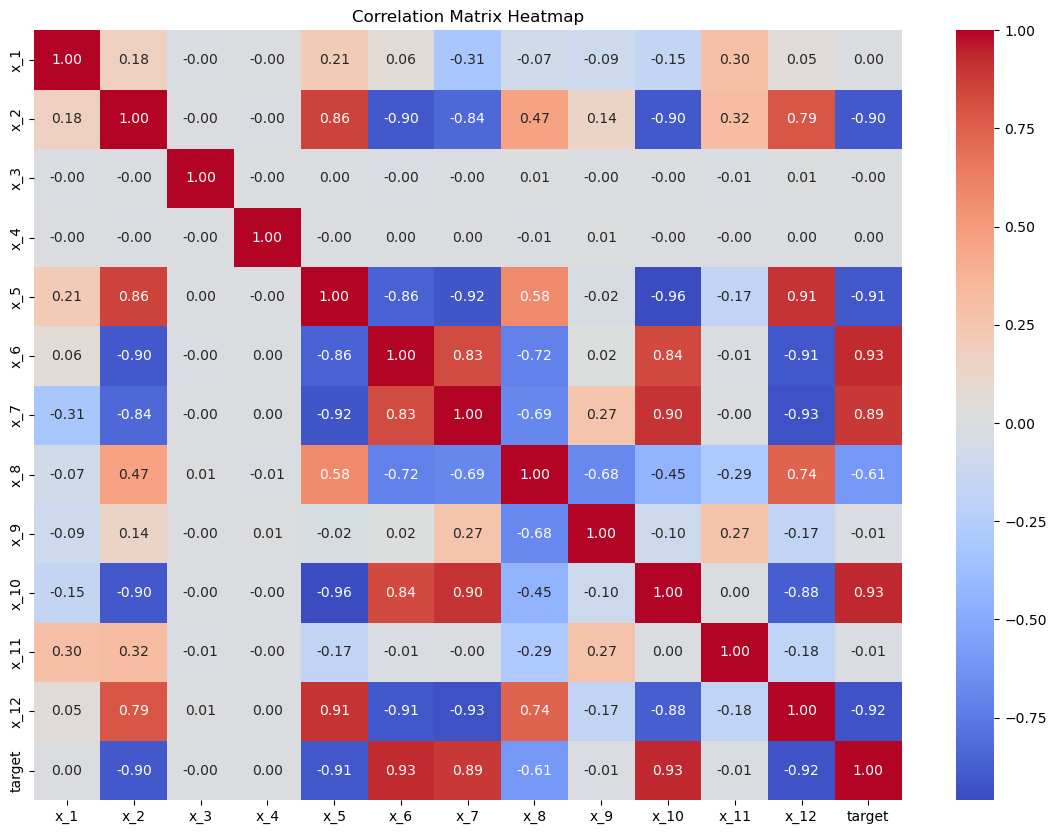

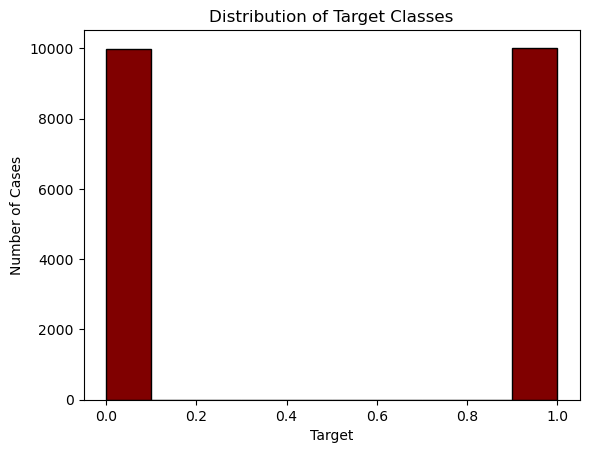

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#g = sns.PairGrid(data=data, hue="target", palette="GnBu_d")
#g.map(plt.scatter, s=50, edgecolor="white")
#g.add_legend() 
#plt.suptitle("Correlation Plots of All Combinations", y=1.02)
#plt.show()  

#plot 1
plt.figure(figsize=(14, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.show()

#plot 2
plt.hist(data=data,x="target", color='maroon', edgecolor='black')
plt.xlabel('Target')
plt.ylabel('Number of Cases')
plt.title('Distribution of Target Classes')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**In a markdown cell, briefly write which one of the classifiers you expect to perform the best.**

# Ex. 1.2

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

regularizations = ['none', 'l1', 'l2']
solvers = {'none': 'lbfgs', 'l1': 'liblinear', 'l2': 'liblinear'}
coef=[]

for i in regularizations:

    if i=='none':
        model= Pipeline([('std_scaler', StandardScaler()), #bhma 1
                  ('regul_regr', LogisticRegression(penalty=i, solver=solvers[i])) #bhma 2
                 ])
    else :
        model= Pipeline([('std_scaler', StandardScaler()), #bhma 1
                  ('regul_regr', LogisticRegression(penalty=i,C=0.001, solver=solvers[i])) #bhma2
                 ])
        
    model.fit(X_train, y_train)
    logistic_model = model.named_steps['regul_regr']
    coef.append(logistic_model.coef_[0])

    #checking the accuracy of our model
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    print(f"Accuracy Score for {i}:",acc)

Accuracy Score for none: 0.994
Accuracy Score for l1: 0.994
Accuracy Score for l2: 0.994


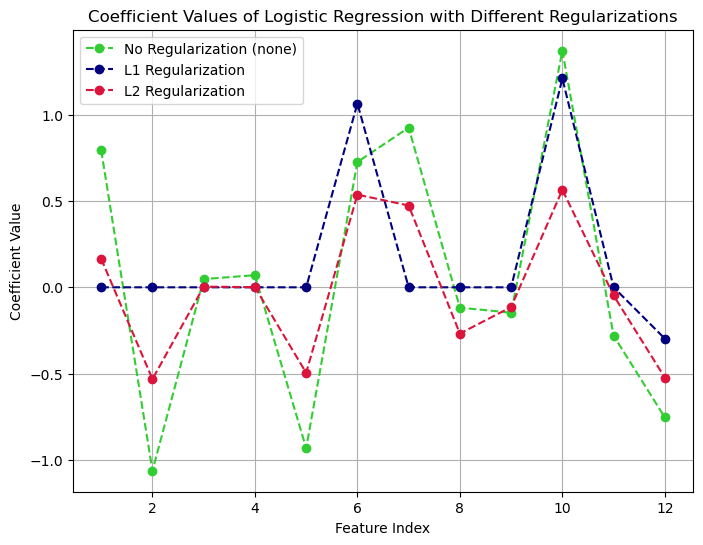

In [5]:
features = range(1,13)  

#plots

plt.figure(figsize=(8, 6))
plt.plot(features, coef[0], marker='o', label='No Regularization (none)', linestyle='--', color='limegreen')
plt.plot(features, coef[1], marker='o', label='L1 Regularization', linestyle='--', color='navy')
plt.plot(features, coef[2], marker='o', label='L2 Regularization', linestyle='--', color='crimson')

plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Coefficient Values of Logistic Regression with Different Regularizations')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Ex. 1.3

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

param_dist = {
    'RandomForest': {'n_estimators': [10, 50, 100, 200],
                     'max_depth': [None, 10, 20, 30],
                     'max_features': [1, 2]},
    'SVM': {'C': [0.1, 1, 5],
            'kernel': ['linear', 'rbf']},
    'LogisticRegression': {'C': [0.1, 1, 10],
                           'penalty': ['l2', 'l1']},
    'kNN': {'n_neighbors': list(range(1, 31)),
            'metric': ['euclidean', 'manhattan']}
}

classifiers = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVM': SVC(),
    'LogisticRegression': LogisticRegression(solver='liblinear'),
    'kNN': KNeighborsClassifier()
}
#-----------------------------------------------------------------------------

best_classifiers = {}
best_scores = {}
# ^These collect the best hyperparamers and the best score for each classifier

# Conduct randomized search with cross-validation for each classifier:
for name, classifier in classifiers.items():
    print('[===== Performing search on %s =====]' % name)

    search= Pipeline([('std_scaler', StandardScaler()), #bhma 1
                  ('regul_regr',  GridSearchCV(classifiers[name],
                        param_grid=param_dist[name],
                        n_jobs=-1, cv=3, scoring='accuracy',
                        verbose=3,return_train_score=True)) #bhma 2
                 ])
    search.fit(X_train, y_train)
    best_classifiers[name] = search.named_steps['regul_regr'].best_estimator_
    best_scores[name] = search.named_steps['regul_regr'].best_score_

    
    print("Best parameters for %s: %s" % (name,search.named_steps['regul_regr'].best_params_))
    print("score: %.2f" % search.named_steps['regul_regr'].best_score_)
    print()
    
# Determine the overall best model:
winner_name = max(best_scores, key=best_scores.get)
# name of winner (a string)
winner_classifier = best_classifiers[winner_name]
# the actuall fitted model (a `sklearn` object)
'''Here we select the winner, based on the average score achieved on the
validation sets.'''

print('\n>>> And the winner is:\n\t')
display(winner_classifier)

[===== Performing search on RandomForest =====]
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best parameters for RandomForest: {'max_depth': None, 'max_features': 1, 'n_estimators': 50}
score: 0.99

[===== Performing search on SVM =====]
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for SVM: {'C': 0.1, 'kernel': 'linear'}
score: 0.99

[===== Performing search on LogisticRegression =====]
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for LogisticRegression: {'C': 0.1, 'penalty': 'l2'}
score: 0.99

[===== Performing search on kNN =====]
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Best parameters for kNN: {'metric': 'euclidean', 'n_neighbors': 5}
score: 0.99


>>> And the winner is:
	


RandomForestClassifier(max_features=1, n_estimators=50, random_state=42)

Accuracy of the winning model: 0.99
Confusion Matrix of the winning model:

[[2956   14]
 [  22 3008]]



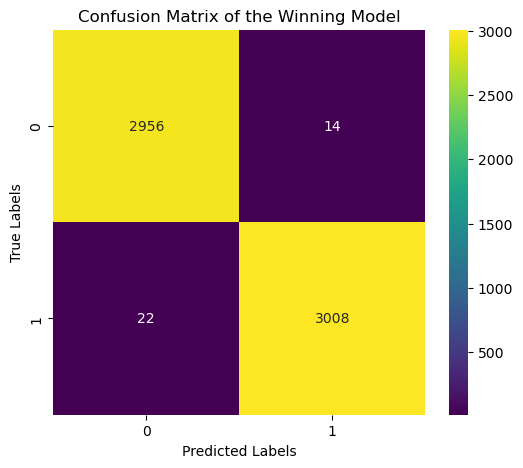

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

#calculating the accuracy score of the winning model
y_pred = winner_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the winning model: %.2f' % accuracy)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix of the winning model:\n')
print(conf_matrix)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print()

#display
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix of the Winning Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
